# 第五次课后习题

学号：20179065 $ \qquad $ 班级序列号：170230 $ \qquad $ 姓名：董秩序

## 0. 名词解释：

* overdetermine
>超定方程组:指方程个数大于未知量个数的方程组。对于方程组$Ra=y$，R为$n×m$矩阵，如果R列满秩，且$n>m$。则方程组没有精确解，此时称方程组为超定方程组。

* pseudo-inverse of a matrix
>伪逆矩阵是逆矩阵的广义形式.矩阵A的伪逆矩阵X与A的转置矩阵$A'$ 同型,并且满足：$AXA=A,XAX=X.$


## 1. numpy求最小二乘解

输入具有不同特征值的$A^TA$ ，和不同方差的n，看最小二乘解的变化情况
求这些最小二乘解的期望
画出相应的协方差矩阵的投影
求解后系统的残差

定理：
>若A是秩为n的$m×n$的矩阵，$Y$为m×1的矩阵,$AX=Y$表达了一个线性方程组,则正规方程组(normal equation)：$A^TAX=A^TY$ 有唯一解：$x=(A^TA)$<sup>-1</sup>$ A^TY$,且x为方程组 $AX = Y$最小二乘解。

条件：
>矩阵$X$必须是列满秩矩阵，否则$X^TX$的逆就不会存在。

当$AX=Y$有解时（即矩阵$[A|Y]$的秩与A的秩相同），$AX=Y$与$A^TAX=A^TY$的解集是一样。

而当$AX=Y$无解时，$A^TAX=A^TY$仍然有解，其解集即最小二乘解（least squares solution），即使得$(AX-Y)^T(AX-Y)$的值最小的解，可以理解为使方程组$AX=Y$近似成立且误差最小的解。

最小二乘法的拟合大体的步骤：定义拟合范式，传入拟合参数，开始拟合得出拟合结果

In [1]:
import numpy as np
import matplotlib.pyplot as plt

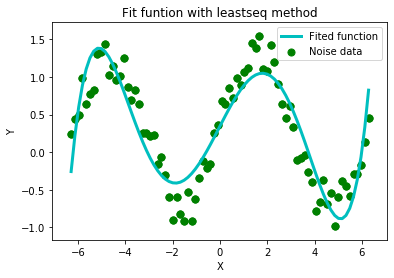

增加样本数：


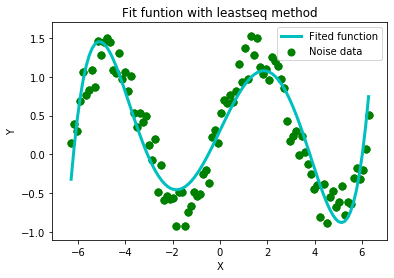

增加权重数量：


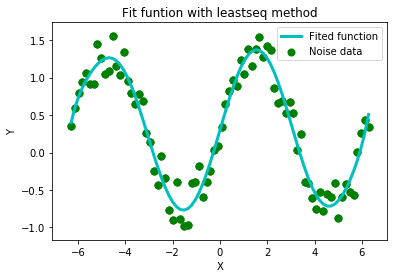

减少噪声：


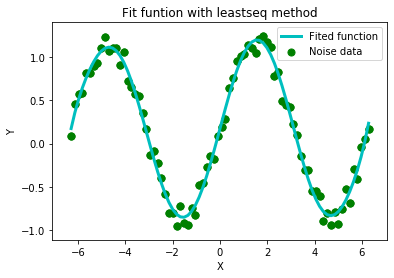

In [7]:
def fun2ploy(x,n):
    '''
    数据生成后为n行0列
    转化为[x^0,x^1,x^2,...x^n]
    首列变1
    '''
    lens = len(x) #求数据个数
    X = np.ones([1,lens])
    for i in range(1,n): #n:拟合参数数量
        X = np.vstack((X, np.power(x,i))) #按行堆叠
        Xt = X.transpose()
    return Xt

def leastseq_byploy(x, y, ploy_dim):
    '''
    最小二乘求解
    返回 权重值
    '''
    #散点图
    plt.scatter(x,y,color="g",marker='o',s = 50)
    X = fun2ploy(x,ploy_dim)
    
    #直接求解
    Xt = X.transpose() #转置变成列向量
    XtX=Xt.dot(X) #矩阵乘
    XtXInv = np.linalg.inv(XtX) #求逆
    XtXInvX = XtXInv.dot(Xt) #点乘
    coef = XtXInvX.dot(y.T) #权重值
    
    y_est = X.dot(coef)
    
    return y_est,coef

def fit_fun(x):
    '''
    选择需要拟合的函数
    '''
    #return np.power(x,5)
    return np.sin(x) 
    #return 3+ 5*x

def main(data_num, ploy_dim, noise_scale):
    # 数据准备
    x = np.array(np.linspace(-2*np.pi, 2*np.pi, data_num))   #数据 
    y = fit_fun(x) + noise_scale*np.random.rand(1, data_num)  #添加噪声

    # 最小二乘拟合
    [y_est,coef] = leastseq_byploy(x, y, ploy_dim)
    
    # 显示拟合结果
    org_data = plt.scatter(x,y,color="g",marker='o',s = 50)
    est_data = plt.plot(x,y_est,color="c",linewidth= 3)
    
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Fit funtion with leastseq method")
    plt.legend(["Fited function","Noise data"]);
    plt.show()
    

if __name__ == '__main__':
    #data_num  数据数量 x个数
    #ploy_dim  拟合参数个数，即权重数量 表示用ploy_dim-1次的多项式来逼近对象
    #noise_scale  噪声参数
    main(80,6,0.6)
    
    print("增加样本数：")
    main(100,6,0.6)
    
    print("增加权重数量：")
    main(80,10,0.6)
    
    print("减少噪声：")
    main(80,10,0.3)

## 2. 应用scipy.optimization模块 

scipy.optimization 子模块提供了函数最小值(标量或多维)、曲线拟合和寻找等式的根的有用算法。
在optimize模块中可以使用 leastsq() 对数据进行最小二乘拟合计算。

leastsq() 函数传入误差计算函数和初始值，该初始值将作为误差计算函数的第一个参数传入。
计算的结果是一个包含两个元素的元组，第一个元素是一个数组，表示拟合后的参数；
第二个元素如果等于1、2、3、4中的其中一个整数，则拟合成功。

In [8]:
from scipy.optimize import leastsq #引入最小二乘法算法

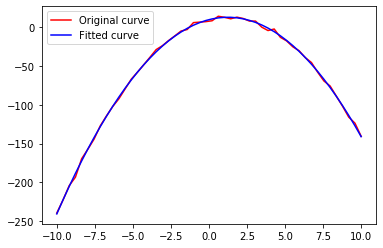

[-2.00940627  4.98830303 10.08461108]


In [9]:
def Fun(p,x):                        # 定义拟合函数形式
    a1,a2,a3 = p
    return a1*x**2+a2*x+a3
def error (p,x,y):                    # 拟合残差
    return Fun(p,x)-y

def main():
    x = np.linspace(-10,10,50)  # 创建时间序列
    p_value = [-2,5,10] # 原始数据的参数
    noise = np.random.randn(len(x))  # 创建随机噪声
    y = Fun(p_value,x)+noise*2 # 加上噪声的序列
    p0 = [0.1,-0.01,50] # 拟合的初始参数设置
    
    para =leastsq(error, p0, args=(x,y)) # 进行拟合
    #leastsq函数的返回值tuple，第一个元素是求解结果，
    #第二个是Value of the cost function at the solution
    
    y_fitted = Fun (para[0],x) # 画出拟合后的曲线
    plt.figure
    plt.plot(x,y,'r', label = 'Original curve')
    plt.plot(x,y_fitted,'-b', label ='Fitted curve')
    plt.legend()
    plt.show()
    print (para[0])
if __name__=='__main__':
    main()

使用curve_fit() 进行拟合

In [10]:
from scipy.optimize import curve_fit

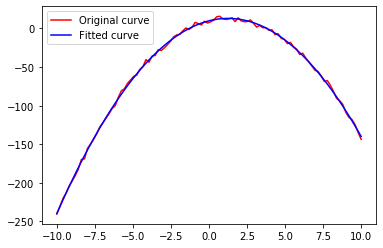

[-1.99841411  4.9993162   9.93758082]


In [11]:
def Fun(x,a1,a2,a3):                   # 定义拟合函数形式
    return a1*x**2+a2*x+a3

def main():
    x = np.linspace(-10,10,100)       # 创建时间序列
    a1,a2,a3 = [-2,5,10]              # 原始数据的参数
    noise = np.random.randn(len(x))   # 创建随机噪声
    y = Fun(x,a1,a2,a3)+noise*2       # 加上噪声的序列
    para,pcov=curve_fit(Fun,x,y)
    y_fitted = Fun(x,para[0],para[1],para[2]) # 画出拟合后的曲线
 
    plt.figure
    plt.plot(x,y,'r', label = 'Original curve')
    plt.plot(x,y_fitted,'-b', label ='Fitted curve')
    plt.legend()
    plt.show()
    print (para)
if __name__=='__main__':
    main()

## 2. 伪逆矩阵pseudoinverse

* 左逆矩阵：满足$A^LA=E$,但不满足$AA^L=E$的矩阵A称为矩阵A的左逆矩阵。
* 右逆矩阵：满足$AA^R=E$，但不满足$A^RA=E$的矩阵A称为矩阵A的右逆矩阵。

仅当$m≥n$时，列满秩，矩阵$A$<sub>m×n</sub>有左逆矩阵，$A^L=(A^TA)$<sup>-1</sup>$A^T$

当$n≥m$时，行满秩，矩阵$A$<sub>m×n</sub>有右逆矩阵，$A^R=A^T(A^TA)$<sup>-1</sup>

当$n=m$，$A$<sub>m×n</sub>的秩为$r≤m=n$，对A进行奇异值分解$A=UDV^T$,
$A$的伪逆矩阵为 $A^+=VD^+U^T$。